In [1]:
%run /home/user/besos/Matthias/tools/imports.ipynb
cities = pd.DataFrame(columns=['city', 'lon', 'lat'])
for i, epw in enumerate(get_weather_files('myCAN')):
    df, metadata = pvlib.iotools.read_epw(epw)
    data = {
        'city': metadata['city'],
        'lon': metadata['longitude'],
        'lat': metadata['latitude']}
    cities.loc[i] = data
cities = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lon, cities.lat))
cities.crs = {'init' :'epsg:4326'}
canada = gpd.read_file("/home/user/map_data/lpr_000b16a_e.shp").to_crs(epsg=4326)

In [2]:
canada['performance'] = np.load('model4_scores_prov_terr.npy')[:,1]
cities['performance'] = np.load('model4_scores_test_loc.npy')[:,1]

(-2460533.052822392, 3728139.42807546, -5208340.962977293, -426086.9455098741)

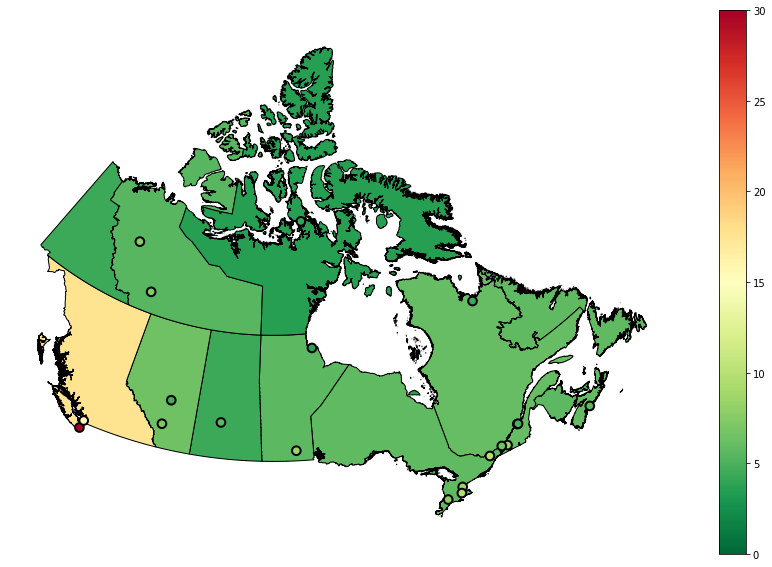

In [3]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax = canada.to_crs(epsg=3573).plot(ax=ax, edgecolor='black', figsize=(20,10), cmap='RdYlGn_r', column='performance', vmin=0, vmax=30, legend=True)
# ax = cities.to_crs(epsg=3573).plot(ax=ax, edgecolor='black', linewidth=2, cmap='Reds', column='performance', vmin=0, vmax=50, legend=True, s=75)
ax = cities.to_crs(epsg=3573).plot(ax=ax, edgecolor='black', linewidth=2, cmap='RdYlGn_r', column='performance', vmin=0, vmax=30, s=75)
plt.axis('off')

In [4]:
fig.savefig('model4_map.png', dpi=300)